# SAR ADC

In [1]:
from sar import SAR

# Generate Signal

In [2]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt

# データのパラメータ
fs = 16384
N = fs
dt = 1/fs
f1 = 1000    # 周波数
t = np.arange(0, fs*dt, dt) # 時間軸
freq = np.linspace(0, 1, fs)*fs # 周波数軸

In [3]:
# offset
offset = 1/(2^12)

# 信号を生成
input = np.sin(2*np.pi*f1*t) #+ 0.001 * np.random.randn(N)

## Conversion

Simulating a 12 bit SAR ADC
Capacitor mismatch not included
plotting conversion results


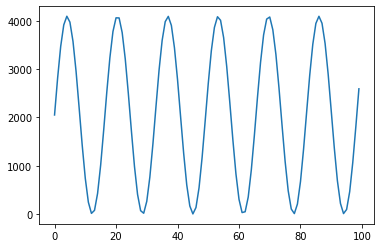

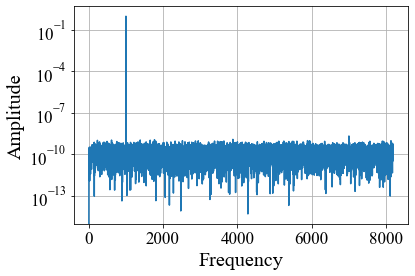

SNDR: [59.01231859]
ENOB: [9.51035192]


In [4]:
# ADCを宣言
adc = SAR(12, 1e-3, 0, 0, 2)

# ADC conversion
adcout = adc.forward_fft(input, True)

## Or you can use adc.forward(input)

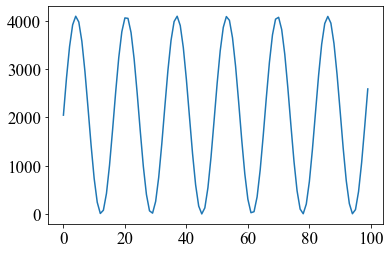

In [5]:
adcout = adc.forward(input)
plt.plot(adcout[:100])

In [6]:
# 高速フーリエ変換
F = np.fft.fft(adcout)

# 振幅スペクトルを計算
Amp = np.power(np.abs(F)[0:int(N/2)-1], 2)
Amp[0] = 0 # cut DC
freq = freq[0:int(N/2)-1]
#Amp = np.abs(F)
#freq = freq

# 正規化
Amp /= max(Amp)

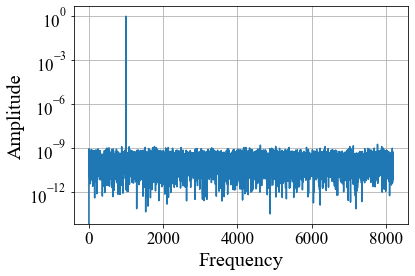

In [7]:
# グラフ表示
plt.figure()
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 17

plt.plot(freq, Amp, label='|F(k)|')
plt.xlabel('Frequency', fontsize=20)
plt.ylabel('Amplitude', fontsize=20)
plt.yscale('log')
plt.grid()
#leg = plt.legend(loc=1, fontsize=25)
#leg.get_frame().set_alpha(1)
plt.show()

In [8]:
# SNR計算
sig_bin = np.where(Amp==np.abs(Amp).max())[0]
signal_power = Amp[sig_bin]

noise_power = Amp.sum() - signal_power

SNR = signal_power / noise_power
SNR = 10*np.log10(SNR)

ENOB = (SNR-1.76) / 6.02
print("SNR:", SNR)
print("ENOB:", ENOB)

SNR: [58.45188173]
ENOB: [9.4172561]
